# Comparsion of Traditional Econometric Methods and ML Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()
fred = Fred(api_key=os.getenv("FRED_API_KEY"))

In [3]:
gdp_components = {
    "PCECC96": "Real Personal Consumption Expenditures",
    "GPDIC1": "Real Gross Private Domestic Investment",
    "GCEC1": "Real Government Consumption Expenditures and Gross Investment",
    "EXPGSC1": "Real Exports of Goods and Services",
    "IMPGSC1": "Real Imports of Goods and Services",
}
data = {}

In [4]:
df_gdp = pd.DataFrame()

path = os.path.join(os.getcwd(), "../data/")
if not os.path.exists(path):
    os.makedirs(path)

output_file = "gdp_components.csv"

if output_file not in os.listdir(path=path):
    for code, name in gdp_components.items():
        data[name] = fred.get_series(code)

    df_gdp = pd.DataFrame(data)
    df_gdp.to_csv(os.path.join(path, output_file), index=True)
else:
    df_gdp = pd.read_csv(os.path.join(path, output_file), index_col=0, parse_dates=True)

df_gdp.index = pd.to_datetime(df_gdp.index)
df_gdp = df_gdp.resample("QS-JAN").last()

In [5]:
df_gdp

,Real Personal Consumption Expenditures,Real Gross Private Domestic Investment,Real Government Consumption Expenditures and Gross Investment,Real Exports of Goods and Services,Real Imports of Goods and Services
1947-01-01,1351.397,227.242,560.515,93.767,53.861
1947-04-01,1373.880,209.836,560.091,92.584,54.898
1947-07-01,1378.358,203.662,560.034,87.885,48.687
1947-10-01,1378.796,243.072,555.556,77.928,51.312
1948-01-01,1385.667,268.012,563.895,74.373,57.862
...,...,...,...,...,...
2023-10-01,15781.367,4244.835,3870.720,2559.591,3496.290
2024-01-01,15856.867,4282.515,3887.718,2571.763,3548.749
2024-04-01,15967.266,4369.185,3917.049,2578.386,3614.047
2024-07-01,16113.035,4377.736,3966.247,2638.199,3707.429


In [6]:
df_gdp = df_gdp.dropna(axis=0, how="all")
df_gdp

,Real Personal Consumption Expenditures,Real Gross Private Domestic Investment,Real Government Consumption Expenditures and Gross Investment,Real Exports of Goods and Services,Real Imports of Goods and Services
1947-01-01,1351.397,227.242,560.515,93.767,53.861
1947-04-01,1373.880,209.836,560.091,92.584,54.898
1947-07-01,1378.358,203.662,560.034,87.885,48.687
1947-10-01,1378.796,243.072,555.556,77.928,51.312
1948-01-01,1385.667,268.012,563.895,74.373,57.862
...,...,...,...,...,...
2023-10-01,15781.367,4244.835,3870.720,2559.591,3496.290
2024-01-01,15856.867,4282.515,3887.718,2571.763,3548.749
2024-04-01,15967.266,4369.185,3917.049,2578.386,3614.047
2024-07-01,16113.035,4377.736,3966.247,2638.199,3707.429


In [7]:
df_gdp["GDP"] = (
    df_gdp["Real Personal Consumption Expenditures"]
    + df_gdp["Real Gross Private Domestic Investment"]
    + df_gdp["Real Government Consumption Expenditures and Gross Investment"]
    + df_gdp["Real Exports of Goods and Services"]
    - df_gdp["Real Imports of Goods and Services"]
).round(2)
df_gdp.head(10)

,Real Personal Consumption Expenditures,Real Gross Private Domestic Investment,Real Government Consumption Expenditures and Gross Investment,Real Exports of Goods and Services,Real Imports of Goods and Services,GDP
1947-01-01,1351.397,227.242,560.515,93.767,53.861,2179.06
1947-04-01,1373.880,209.836,560.091,92.584,54.898,2181.49
1947-07-01,1378.358,203.662,560.034,87.885,48.687,2181.25
1947-10-01,1378.796,243.072,555.556,77.928,51.312,2204.04
1948-01-01,1385.667,268.012,563.895,74.373,57.862,2234.08
1948-04-01,1401.789,284.598,583.846,67.420,60.156,2277.50
1948-07-01,1403.859,287.514,596.087,69.005,63.297,2293.17
1948-10-01,1415.063,273.765,618.100,66.573,62.270,2311.23
1949-01-01,1417.353,232.885,634.547,74.540,60.402,2298.92
1949-04-01,1439.077,201.926,662.174,73.902,59.521,2317.56


In [8]:
import pmdarima as pm
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [9]:
train, test = train_test_split(
    df_gdp, train_size=0.7, test_size=0.3, shuffle=False, random_state=42
)

In [10]:
model_arima = pm.auto_arima(
    train["GDP"],
    seasonal=False,
    stepwise=True,
    trace=True,
    suppress_warnings=True,
)

# Forecast using ARIMA
forecast_arima = model_arima.predict(n_periods=len(test))

# Calculate ARIMA RMSE and MAPE
rmse_arima = np.sqrt(root_mean_squared_error(test["GDP"], forecast_arima))
mape_arima = mean_absolute_percentage_error(test["GDP"], forecast_arima)

print(f"ARIMA RMSE: {rmse_arima:.2f}")
print(f"ARIMA MAPE: {mape_arima:.2%}")

d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finit

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2384.205, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2327.036, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2310.396, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2382.215, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=2310.150, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=2311.329, Time=0.08 sec


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2308.762, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2308.481, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2304.717, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2325.045, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=2296.353, Time=0.08 sec


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finit

 ARIMA(2,2,0)(0,0,0)[0]             : AIC=2323.553, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=2297.649, Time=0.11 sec


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2296.680, Time=0.12 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2309.384, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=2314.572, Time=0.03 sec


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,2)(0,0,0)[0]             : AIC=2297.886, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]          
Total fit time: 1.463 seconds
ARIMA RMSE: 24.76
ARIMA MAPE: 2.71%


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [11]:
exog_vars = [
    "Real Personal Consumption Expenditures",
    "Real Gross Private Domestic Investment",
    "Real Government Consumption Expenditures and Gross Investment",
    "Real Exports of Goods and Services",
    "Real Imports of Goods and Services",
]

# Train SARIMA model with exogenous variables
model_sarima = pm.auto_arima(
    train["GDP"],
    exogenous=train[exog_vars],
    seasonal=True,
    m=4,  # Quarterly seasonality
    stepwise=True,
    trace=True,
    suppress_warnings=True,
)

# Forecast using SARIMA with exogenous variables
forecast_sarima = model_sarima.predict(n_periods=len(test), exogenous=test[exog_vars])

# Calculate SARIMA RMSE and MAPE
rmse_sarima = np.sqrt(root_mean_squared_error(test["GDP"], forecast_sarima))
mape_sarima = mean_absolute_percentage_error(test["GDP"], forecast_sarima)

print(f"SARIMA RMSE: {rmse_sarima:.2f}")
print(f"SARIMA MAPE: {mape_sarima:.2%}")

Performing stepwise search to minimize aic


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finit

 ARIMA(2,2,2)(1,0,1)[4]             : AIC=2300.103, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=2382.215, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=2327.007, Time=0.04 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=2310.458, Time=0.05 sec


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,2)(0,0,1)[4]             : AIC=2298.063, Time=0.20 sec
 ARIMA(2,2,2)(0,0,0)[4]             : AIC=2296.680, Time=0.12 sec


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,2)(1,0,0)[4]             : AIC=2298.220, Time=0.17 sec
 ARIMA(1,2,2)(0,0,0)[4]             : AIC=2309.384, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[4]             : AIC=2296.353, Time=0.07 sec


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(1,0,0)[4]             : AIC=2297.353, Time=0.12 sec
 ARIMA(2,2,1)(0,0,1)[4]             : AIC=2297.118, Time=0.14 sec


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(1,0,1)[4]             : AIC=2299.987, Time=0.25 sec
 ARIMA(1,2,1)(0,0,0)[4]             : AIC=2304.717, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[4]             : AIC=2323.553, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[4]             : AIC=2297.649, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[4]             : AIC=2325.045, Time=0.03 sec


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finit

 ARIMA(3,2,0)(0,0,0)[4]             : AIC=2314.572, Time=0.04 sec
 ARIMA(3,2,2)(0,0,0)[4]             : AIC=2297.886, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[4] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(2,2,1)(0,0,0)[4]          
Total fit time: 1.822 seconds
SARIMA RMSE: 24.76
SARIMA MAPE: 2.71%


d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\AI in Economic and Policy Decisions\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


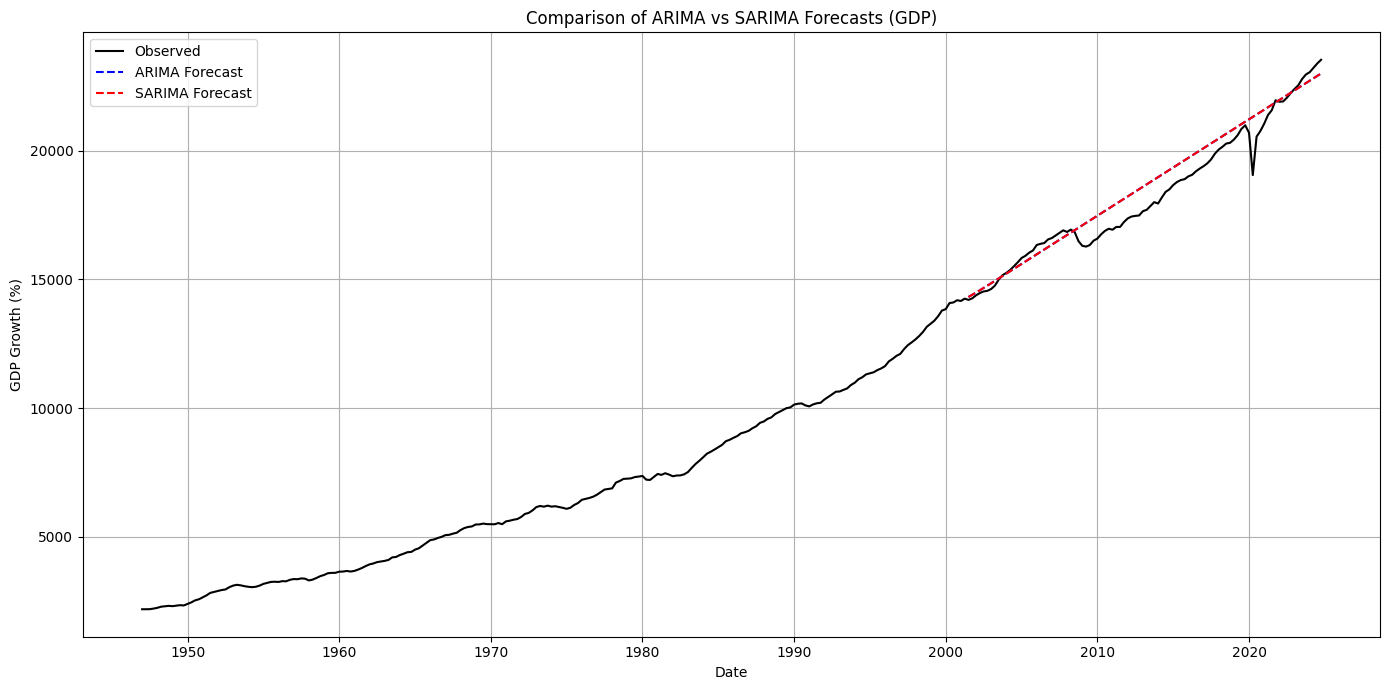

In [12]:
future_index = test.index

# Plot the observed and forecasted values for both ARIMA and SARIMA
plt.figure(figsize=(14, 7))
plt.plot(df_gdp.index, df_gdp["GDP"], label="Observed", color="black")
plt.plot(
    future_index, forecast_arima, label="ARIMA Forecast", linestyle="--", color="blue"
)
plt.plot(
    future_index, forecast_sarima, label="SARIMA Forecast", linestyle="--", color="red"
)

plt.title("Comparison of ARIMA vs SARIMA Forecasts (GDP)")
plt.xlabel("Date")
plt.ylabel("GDP Growth (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
forecast_table = pd.DataFrame(
    {
        "Date": future_index,
        "Observed GDP": test["GDP"],
        "ARIMA Forecast": forecast_arima,
        "SARIMA Forecast": forecast_sarima,
    }
)

forecast_table.to_latex(
    "../data/gdp_forecast_table.tex",
    index=False,
    float_format="%.2f",
    column_format="|c|c|c|c|",
    header=["Date", "Observed GDP", "ARIMA Forecast", "SARIMA Forecast"],
    caption="Forecasted GDP using ARIMA and SARIMA models.",
    label="tab:gdp_forecast",
)

In [14]:
metrics_table = pd.DataFrame(
    {
        "Model": ["ARIMA", "SARIMA"],
        "RMSE": [rmse_arima, rmse_sarima],
        "MAPE (%)": [mape_arima, mape_sarima],
    }
)

metrics_table.to_latex(
    "../data/gdp_metrics_table.tex",
    index=False,
    float_format="%.2f",
    column_format="|c|c|c|",
    header=["Model", "RMSE", "MAPE (%)"],
    caption="Model performance metrics for ARIMA and SARIMA.",
    label="tab:gdp_metrics",
)

In [15]:
df_gdp["GDP_growth"] = df_gdp["GDP"].pct_change()

X = df_gdp.drop(columns=["GDP", "GDP_growth"])
y = df_gdp["GDP_growth"].shift(-1)  # Predict next period's growth

# Drop missing values due to shift and pct_change
data = pd.concat([X, y], axis=1).dropna()

X = data.drop(columns=["GDP_growth"])
y = data["GDP_growth"]

In [16]:
df_gdp.sample(10)

,Real Personal Consumption Expenditures,Real Gross Private Domestic Investment,Real Government Consumption Expenditures and Gross Investment,Real Exports of Goods and Services,Real Imports of Goods and Services,GDP,GDP_growth
1954-10-01,1761.703,295.882,1049.200,72.479,81.412,3097.85,0.014651
1953-07-01,1685.752,294.261,1149.285,67.767,87.891,3109.17,-0.006293
1953-01-01,1679.665,298.847,1138.261,64.752,83.877,3097.65,0.020343
1991-07-01,6413.521,1191.028,2578.454,718.914,718.810,10183.11,0.004405
1993-04-01,6811.522,1367.575,2561.456,779.368,815.792,10704.13,0.005840
1987-07-01,5875.641,1206.662,2364.769,481.019,638.858,9289.23,0.008327
1988-01-01,5992.101,1227.008,2380.198,526.673,650.470,9475.51,0.005617
1987-04-01,5809.376,1206.486,2362.291,461.008,626.643,9212.52,0.010963
2021-04-01,14809.081,3777.719,3709.192,2253.207,3164.663,21384.54,0.015821
2013-07-01,11896.258,2998.991,3272.825,2188.712,2507.502,17849.28,0.008437


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [19]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_rmse = np.sqrt(root_mean_squared_error(y_test, lr_preds))
lr_mae = mean_absolute_error(y_test, lr_preds)

print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Linear Regression MAE: {lr_mae:.2f}")

Linear Regression RMSE: 0.14
Linear Regression MAE: 0.02


In [20]:
comparison_df = pd.DataFrame({"Actual GDP": y_test.values, "Predicted GDP": lr_preds})

comparison_df["Date"] = X_test.index
comparison_df.set_index("Date", inplace=True)
comparison_df = comparison_df.resample("QS-JAN").mean()
comparison_df = comparison_df.dropna()
comparison_df

,Actual GDP,Predicted GDP
Date,,
2001-04-01,-0.003420,0.013123
2001-07-01,0.004254,0.015155
2001-10-01,0.008300,0.018543
2002-01-01,0.006095,0.017440
2002-04-01,0.004269,0.017437
...,...,...
2023-07-01,0.007850,0.027244
2023-10-01,0.003915,0.027572
2024-01-01,0.007277,0.028400


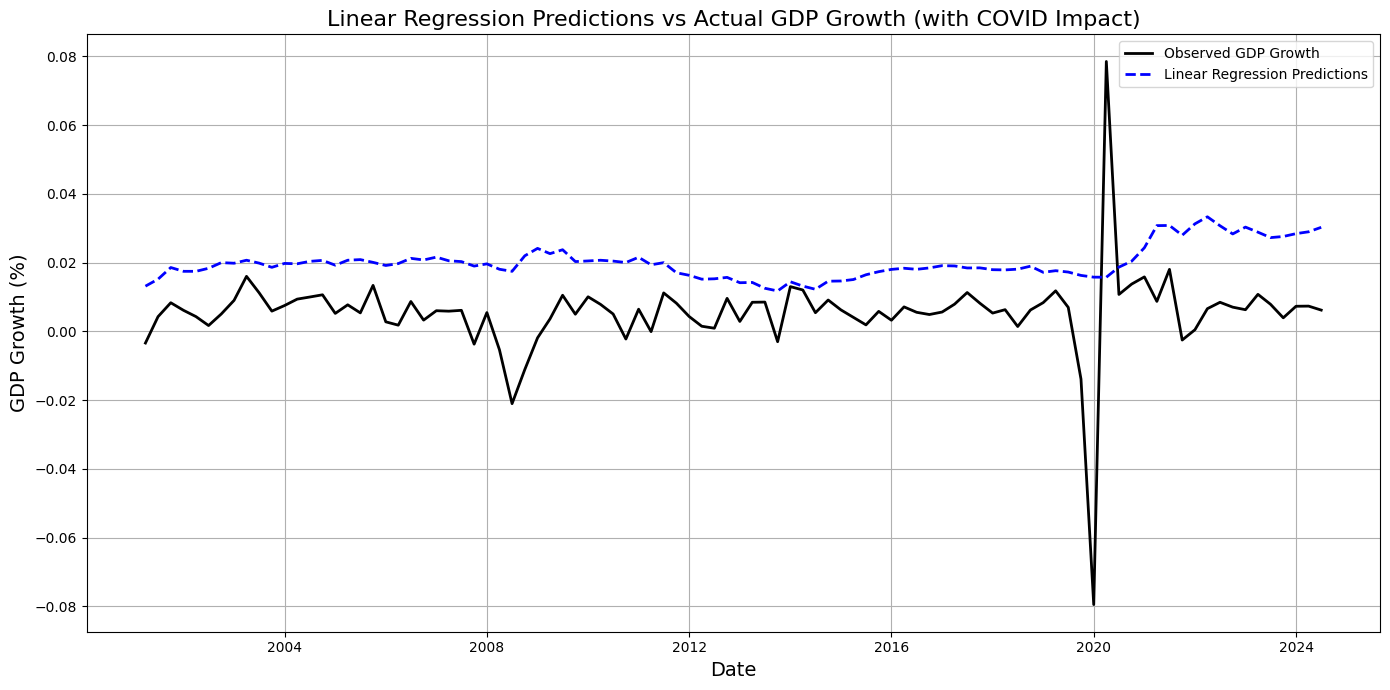

In [21]:
plt.figure(figsize=(14, 7))

sns.lineplot(x=y_test.index, y=y_test, label="Observed GDP Growth", color="black", linewidth=2)

sns.lineplot(x=y_test.index, y=lr_preds, label="Linear Regression Predictions", linestyle="--", color="blue", linewidth=2)

plt.title("Linear Regression Predictions vs Actual GDP Growth (with COVID Impact)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("GDP Growth (%)", fontsize=14)
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

In [22]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
rf_preds = rf_model.predict(X_test)

# Calculate RMSE and MAPE
rf_rmse = np.sqrt(root_mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest MAE: {rf_mae:.2f}")

Random Forest RMSE: 0.12
Random Forest MAE: 0.01


In [23]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test data
xgb_preds = xgb_model.predict(X_test)

# Calculate RMSE and MAPE
xgb_rmse = np.sqrt(root_mean_squared_error(y_test, xgb_preds))
xgb_mae = mean_absolute_error(y_test, xgb_preds)
print(f"XGBoost RMSE: {xgb_rmse:.2f}")
print(f"XGBoost MAE: {xgb_mae:.2f}")

XGBoost RMSE: 0.12
XGBoost MAE: 0.01


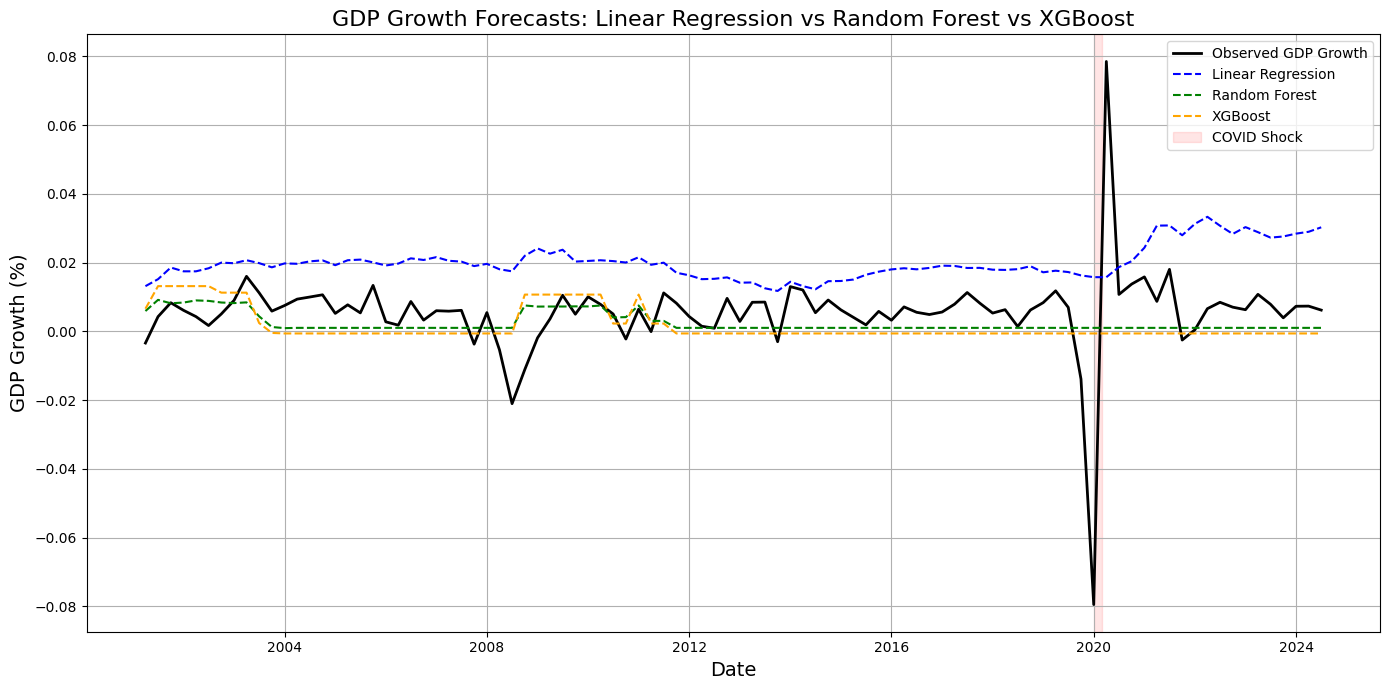

In [24]:
plt.figure(figsize=(14, 7))

sns.lineplot(
    x=y_test.index, y=y_test, label="Observed GDP Growth", color="black", linewidth=2
)
sns.lineplot(
    x=y_test.index, y=lr_preds, label="Linear Regression", linestyle="--", color="blue"
)
sns.lineplot(
    x=y_test.index, y=rf_preds, label="Random Forest", linestyle="--", color="green"
)
sns.lineplot(
    x=y_test.index, y=xgb_preds, label="XGBoost", linestyle="--", color="orange"
)

plt.axvspan(
    pd.to_datetime("2020-01-01"),
    pd.to_datetime("2020-03-01"),
    color="red",
    alpha=0.1,
    label="COVID Shock",
)

plt.title(
    "GDP Growth Forecasts: Linear Regression vs Random Forest vs XGBoost", fontsize=16
)
plt.xlabel("Date", fontsize=14)
plt.ylabel("GDP Growth (%)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
from ngboost import NGBRegressor
from ngboost.distns import Normal

ngb = NGBRegressor(Dist=Normal)
ngb.fit(X_train, y_train)

ngb_preds = ngb.predict(X_test)
ngb_rmse = np.sqrt(root_mean_squared_error(y_test, ngb_preds))
ngb_mae = mean_absolute_error(y_test, ngb_preds)

print(f"NGB RMSE: {ngb_rmse:.2f}")
print(f"NGB MAE: {ngb_mae:.2f}")

[iter 0] loss=-3.3185 val_loss=0.0000 scale=1.0000 norm=0.5426
[iter 100] loss=-3.6370 val_loss=0.0000 scale=1.0000 norm=0.3733
[iter 200] loss=-3.7864 val_loss=0.0000 scale=1.0000 norm=0.3582
[iter 300] loss=-3.8915 val_loss=0.0000 scale=1.0000 norm=0.3637
[iter 400] loss=-3.9874 val_loss=0.0000 scale=1.0000 norm=0.3574
NGB RMSE: 0.12
NGB MAE: 0.01


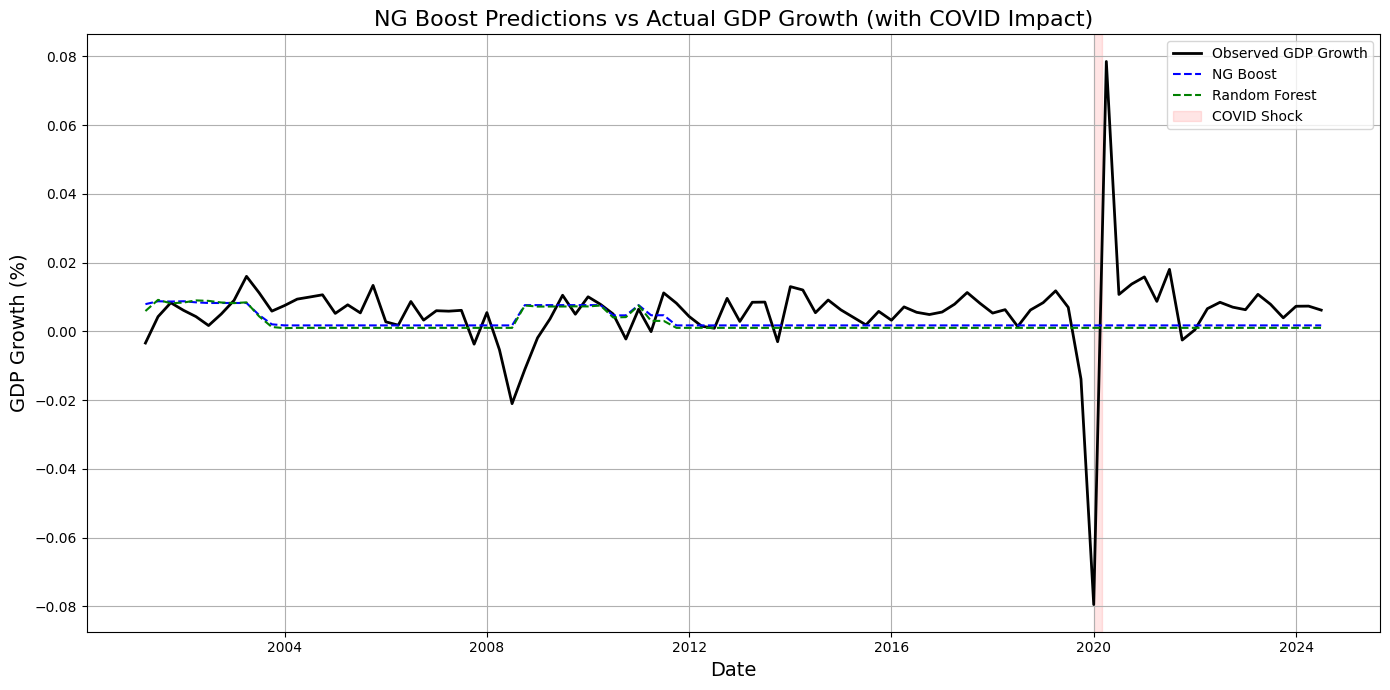

In [26]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    x=y_test.index, y=y_test, label="Observed GDP Growth", color="black", linewidth=2
)
sns.lineplot(
    x=y_test.index, y=ngb_preds, label="NG Boost", linestyle="--", color="blue"
)
sns.lineplot(
    x=y_test.index, y=rf_preds, label="Random Forest", linestyle="--", color="green"
)
plt.axvspan(
    pd.to_datetime("2020-01-01"),
    pd.to_datetime("2020-03-01"),
    color="red",
    alpha=0.1,
    label="COVID Shock",
)
plt.title("NG Boost Predictions vs Actual GDP Growth (with COVID Impact)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("GDP Growth (%)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
def create_sequences(X, y, window_size=4):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y[i+window_size])
    return np.array(X_seq), np.array(y_seq)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_rnn, y_rnn = create_sequences(X_scaled, y.values, window_size=4)

split = int(0.7 * len(X_rnn))
X_train_rnn, X_test_rnn = X_rnn[:split], X_rnn[split:]
y_train_rnn, y_test_rnn = y_rnn[:split], y_rnn[split:]

In [30]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [31]:
n_lags = 4
gdp_growth = df_gdp["GDP_growth"].values

X, y = [], []
for i in range(len(gdp_growth) - n_lags):
    X.append(gdp_growth[i : i + n_lags])
    y.append(gdp_growth[i + n_lags])

X = np.array(X)
y = np.array(y)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

mask = ~torch.isnan(X_tensor).any(dim=(1, 2))

X_tensor = X_tensor[mask]
y_tensor = y_tensor[mask]
# Create DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

# Check shape
print("Input shape:", X_tensor.shape)
print("Target shape:", y_tensor.shape)

Input shape: torch.Size([307, 4, 1])
Target shape: torch.Size([307, 1])


In [32]:
class GDP_RNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=1):
        super(GDP_RNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :] 
        out = self.fc(out)
        return out

In [ ]:
model = GDP_RNN()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [34]:
num_epochs = 100
for epoch in range(num_epochs):
    epoch_loss = 0
    for seq, target in dataloader:
        output = model(seq)
        loss = loss_fn(output, target)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        epoch_loss += loss.item() * seq.size(0)  # Sum batch loss

    epoch_loss /= len(dataloader.dataset)

    if torch.isnan(loss):
        print(f"Stopping training at epoch {epoch} due to NaN loss.")
        break

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Avg Loss: {epoch_loss:.6f}")

Epoch [10/100], Avg Loss: 0.000121
Epoch [20/100], Avg Loss: 0.000128
Epoch [30/100], Avg Loss: 0.000127
Epoch [40/100], Avg Loss: 0.000125
Epoch [50/100], Avg Loss: 0.000124
Epoch [60/100], Avg Loss: 0.000123
Epoch [70/100], Avg Loss: 0.000121
Epoch [80/100], Avg Loss: 0.000120
Epoch [90/100], Avg Loss: 0.000119
Epoch [100/100], Avg Loss: 0.000118


In [35]:
model.eval()
with torch.no_grad():
    # Directly use X_tensor if it's already 3D
    predictions = model(X_tensor).squeeze().numpy()
    actuals = y_tensor.squeeze().numpy()

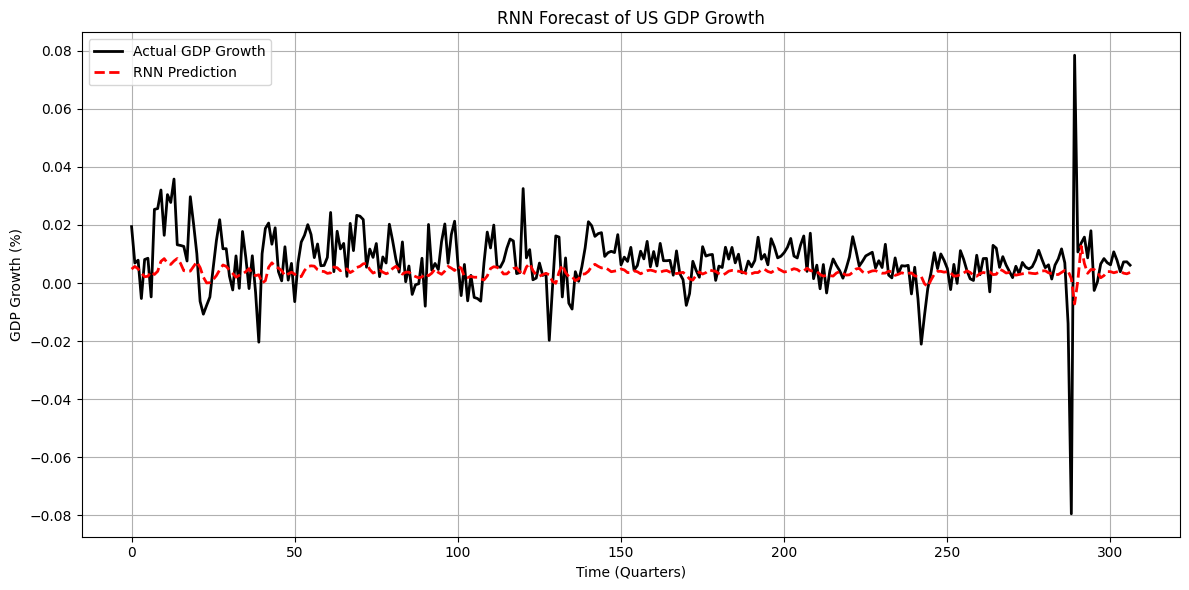

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(actuals, label="Actual GDP Growth", color="black", linewidth=2)
plt.plot(predictions, label="RNN Prediction", linestyle="--", color="red", linewidth=2)

plt.title("RNN Forecast of US GDP Growth")
plt.xlabel("Time (Quarters)")
plt.ylabel("GDP Growth (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
df_news = pd.read_csv(
    os.path.join(os.getcwd(), "../data/economic_headlines.csv"), parse_dates=["Date"]
)

In [38]:
df_news["Date"] = pd.to_datetime(df_news["Date"])
df_news["Quarter"] = df_news["Date"].dt.to_period("Q-DEC")

In [39]:
df_news.sample(10)

,Date,Headline,Quarter
32,2018-08-03,Experts warn about rising exports,2018Q3
103,2019-05-13,Recovery signs appear in interest rates sector,2019Q2
120,2019-08-06,recession shows unexpected surge in Q2,2019Q3
237,2021-01-02,inflation falls to lowest since 2009,2021Q1
4,2018-04-14,economic outlook rises sharply amid global unc...,2018Q2
68,2019-01-19,economic outlook rises sharply amid global unc...,2019Q1
146,2019-11-22,Experts warn about rising inflation,2019Q4
143,2019-11-18,COVID-19 worsens impact on unemployment,2019Q4
175,2020-04-16,Recovery signs appear in recession sector,2020Q2
201,2020-07-10,fiscal deficit shows unexpected surge in Q2,2020Q3


In [40]:
from transformers import BertTokenizer, BertModel
from tqdm import tqdm

In [41]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")
bert_model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [42]:
def get_bert_embeddings(text):
    with torch.no_grad():
        inputs = tokenizer(
            text, return_tensors="pt", truncation=True, padding=True, max_length=32
        )
        outputs = bert_model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1)  # [CLS] representation
        return embedding.squeeze().numpy()

In [43]:
embeddings = []
for headline in tqdm(df_news["Headline"]):
    embedding = get_bert_embeddings(headline)
    embeddings.append(embedding)

100%|██████████| 255/255 [00:04<00:00, 53.32it/s]


In [44]:
embedding_df = pd.DataFrame(embeddings)
embedding_df['Quarter'] = df_news['Quarter'].values

In [45]:
embedding_df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,Quarter
0,-0.097721,-0.047594,0.259154,0.132451,0.026846,-0.198860,0.147042,0.417521,-0.381920,-0.031287,...,0.235310,0.143408,-0.114228,0.364436,-0.407660,0.247777,-0.410093,0.113191,-0.411580,2018Q2
1,0.171208,0.187262,0.091703,-0.004776,-0.130140,-0.080093,0.028686,0.529435,-0.372725,-0.023007,...,-0.225669,-0.092548,0.021159,0.163860,-0.179027,-0.039701,-0.595443,-0.227864,-0.428974,2018Q2
2,-0.627936,-0.481401,0.587085,0.306246,0.170893,-0.134491,0.110314,0.306343,-0.478692,-0.032464,...,0.243738,0.196500,0.069707,0.479148,-0.476703,0.076098,-0.412425,0.198714,-0.598463,2018Q2
3,-0.266638,-0.389984,-0.013447,0.008928,0.269031,-0.007805,0.072658,0.633067,-0.459437,-0.100252,...,-0.149369,0.027416,-0.047854,0.445881,-0.342661,-0.055065,-0.552227,-0.164894,-0.029087,2018Q2
4,-0.370761,0.074928,0.281943,0.151378,0.047869,0.117991,0.093646,0.852030,-0.280746,-0.231089,...,-0.139852,0.227184,-0.142180,0.433820,-0.559317,0.105180,-0.608845,-0.253422,-0.552799,2018Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.677413,-0.070631,0.322629,0.161334,-0.078072,0.092041,0.305219,0.895361,-0.432706,-0.306606,...,0.246547,0.132038,-0.207254,0.549173,-0.411138,0.167065,-0.375168,0.195277,-0.039482,2021Q1
251,-0.062605,0.050742,0.110391,0.181427,0.462495,-0.002723,-0.267065,0.281761,-0.311671,-0.280540,...,-0.368449,-0.168151,0.029105,0.236791,-0.360319,-0.222474,-0.044053,-0.020517,-0.189421,2021Q1
252,0.171974,0.021756,0.181526,0.086646,0.165593,-0.231044,-0.066377,0.500778,-0.414597,-0.268467,...,-0.339290,-0.167542,0.120870,0.203265,-0.121095,-0.058603,-0.614385,-0.005866,-0.558989,2021Q1
253,-0.037322,-0.037970,0.225097,0.137259,0.053692,-0.275172,-0.042934,0.340127,-0.237527,0.012087,...,0.141426,0.081698,-0.111635,0.282542,-0.515288,0.091647,-0.230952,0.086842,-0.402465,2021Q1


In [46]:
quarterly_embeddings = embedding_df.groupby("Quarter").mean().reset_index()
quarterly_embeddings.columns = ["Quarter"] + [f"BERT_{i}" for i in range(768)]

In [47]:
df_gdp = df_gdp.reset_index()

In [48]:
df_gdp.rename(columns={"index": "Date"}, inplace=True)
df_gdp["Quarter"] = df_gdp["Date"].dt.to_period("Q-DEC")
df_gdp.head(10)

,Date,Real Personal Consumption Expenditures,Real Gross Private Domestic Investment,Real Government Consumption Expenditures and Gross Investment,Real Exports of Goods and Services,Real Imports of Goods and Services,GDP,GDP_growth,Quarter
0,1947-01-01,1351.397,227.242,560.515,93.767,53.861,2179.06,NaN,1947Q1
1,1947-04-01,1373.880,209.836,560.091,92.584,54.898,2181.49,0.001115,1947Q2
2,1947-07-01,1378.358,203.662,560.034,87.885,48.687,2181.25,-0.000110,1947Q3
3,1947-10-01,1378.796,243.072,555.556,77.928,51.312,2204.04,0.010448,1947Q4
4,1948-01-01,1385.667,268.012,563.895,74.373,57.862,2234.08,0.013630,1948Q1
5,1948-04-01,1401.789,284.598,583.846,67.420,60.156,2277.50,0.019435,1948Q2
6,1948-07-01,1403.859,287.514,596.087,69.005,63.297,2293.17,0.006880,1948Q3
7,1948-10-01,1415.063,273.765,618.100,66.573,62.270,2311.23,0.007876,1948Q4
8,1949-01-01,1417.353,232.885,634.547,74.540,60.402,2298.92,-0.005326,1949Q1
9,1949-04-01,1439.077,201.926,662.174,73.902,59.521,2317.56,0.008108,1949Q2


In [49]:
combined_df = pd.merge(df_gdp, quarterly_embeddings, on="Quarter", how="left")

In [50]:
combined_df

,Date,Real Personal Consumption Expenditures,Real Gross Private Domestic Investment,Real Government Consumption Expenditures and Gross Investment,Real Exports of Goods and Services,Real Imports of Goods and Services,GDP,GDP_growth,Quarter,BERT_0,...,BERT_758,BERT_759,BERT_760,BERT_761,BERT_762,BERT_763,BERT_764,BERT_765,BERT_766,BERT_767
0,1947-01-01,1351.397,227.242,560.515,93.767,53.861,2179.06,NaN,1947Q1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1947-04-01,1373.880,209.836,560.091,92.584,54.898,2181.49,0.001115,1947Q2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1947-07-01,1378.358,203.662,560.034,87.885,48.687,2181.25,-0.000110,1947Q3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1947-10-01,1378.796,243.072,555.556,77.928,51.312,2204.04,0.010448,1947Q4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1948-01-01,1385.667,268.012,563.895,74.373,57.862,2234.08,0.013630,1948Q1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2023-10-01,15781.367,4244.835,3870.720,2559.591,3496.290,22960.22,0.007850,2023Q4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,2024-01-01,15856.867,4282.515,3887.718,2571.763,3548.749,23050.11,0.003915,2024Q1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,2024-04-01,15967.266,4369.185,3917.049,2578.386,3614.047,23217.84,0.007277,2024Q2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,2024-07-01,16113.035,4377.736,3966.247,2638.199,3707.429,23387.79,0.007320,2024Q3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Drop rows with missing BERT features
filtered_df = combined_df.dropna()

X_bert = filtered_df.drop(columns=["GDP_growth", "Quarter", "Date"])
y_bert = filtered_df["GDP_growth"]
plot_dates = filtered_df["Date"]  # Save for x-axis plotting

# Set Index to Date for time series analysis
X_bert.set_index(filtered_df["Date"], inplace=True)
y_bert.index = filtered_df["Date"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bert, y_bert, test_size=0.3, shuffle=False)
plot_dates_test = plot_dates.iloc[len(X_train):]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_bert, y_bert, test_size=0.3, shuffle=False)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

preds = xgb_model.predict(X_test)
rmse = root_mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

RMSE: 0.0593, MAE: 0.0507


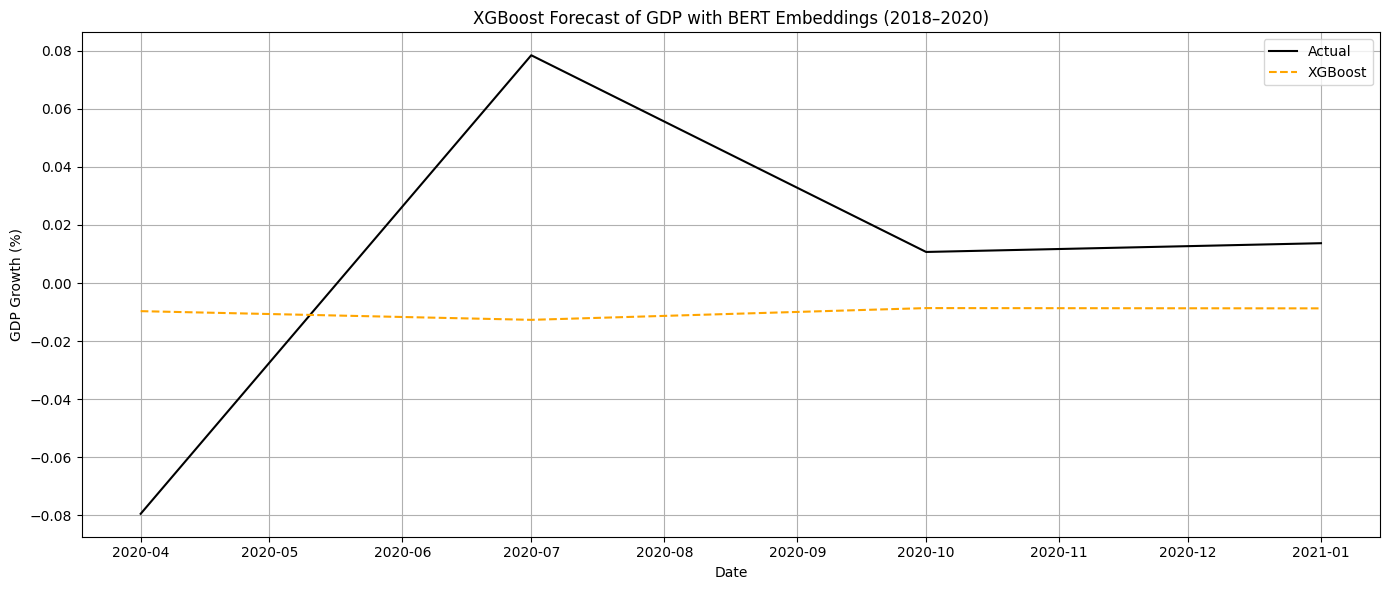

In [61]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=plot_dates_test, y=y_test.values, label="Actual", color="black")
sns.lineplot(x=plot_dates_test, y=preds, label="XGBoost", linestyle="--", color="orange")
plt.title("XGBoost Forecast of GDP with BERT Embeddings (2018–2020)")
plt.xlabel("Date")
plt.ylabel("GDP Growth (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_rmse = np.sqrt(root_mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
print(f"Random Forest RMSE: {rf_rmse:.4f}, MAE: {rf_mae:.4f}")

Random Forest RMSE: 0.2372, MAE: 0.0442


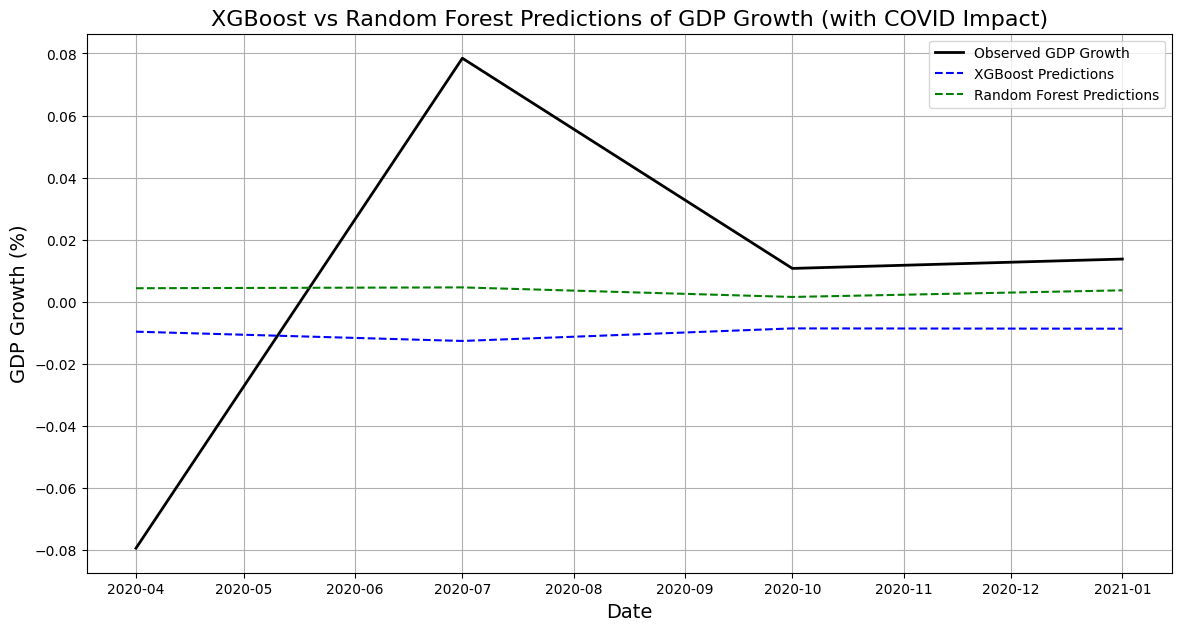

In [66]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    x=plot_dates_test,
    y=y_test.values,
    label="Observed GDP Growth",
    color="black",
    linewidth=2,
)
sns.lineplot(
    x=plot_dates_test,
    y=preds,
    label="XGBoost Predictions",
    linestyle="--",
    color="blue",
)

sns.lineplot(
    x=plot_dates_test,
    y=rf_preds,
    label="Random Forest Predictions",
    linestyle="--",
    color="green",
)

plt.title(
    "XGBoost vs Random Forest Predictions of GDP Growth (with COVID Impact)",
    fontsize=16,
)
plt.xlabel("Date", fontsize=14)
plt.ylabel("GDP Growth (%)", fontsize=14)
plt.legend()
plt.grid(True)

In [67]:
n_lags = 4  # number of time steps
X_seq, y_seq = [], []

X_array = X_bert.values
y_array = y_bert.values

for i in range(len(X_array) - n_lags):
    X_seq.append(X_array[i:i+n_lags])
    y_seq.append(y_array[i+n_lags])

X_seq = np.array(X_seq)  # shape: (samples, lags, features)
y_seq = np.array(y_seq)

In [68]:
# Convert to tensors
X_tensor = torch.tensor(X_seq, dtype=torch.float32)
y_tensor = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(1)

# Create DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

In [69]:
model = GDP_RNN(input_size=X_tensor.shape[2])
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

for epoch in range(50):
    epoch_loss = 0
    for xb, yb in dataloader:
        preds = model(xb)
        loss = loss_fn(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
    print(f"Epoch {epoch+1} - Loss: {epoch_loss / len(dataloader.dataset):.4f}")


Epoch 1 - Loss: 0.1293
Epoch 2 - Loss: 8.5143
Epoch 3 - Loss: 0.5871
Epoch 4 - Loss: 1.8838
Epoch 5 - Loss: 4.7679
Epoch 6 - Loss: 3.1575
Epoch 7 - Loss: 0.5776
Epoch 8 - Loss: 0.1618
Epoch 9 - Loss: 1.6208
Epoch 10 - Loss: 2.4816
Epoch 11 - Loss: 1.7366
Epoch 12 - Loss: 0.4665
Epoch 13 - Loss: 0.0101
Epoch 14 - Loss: 0.5882
Epoch 15 - Loss: 1.2774
Epoch 16 - Loss: 1.2315
Epoch 17 - Loss: 0.5793
Epoch 18 - Loss: 0.0497
Epoch 19 - Loss: 0.1132
Epoch 20 - Loss: 0.5456
Epoch 21 - Loss: 0.7713
Epoch 22 - Loss: 0.5456
Epoch 23 - Loss: 0.1517
Epoch 24 - Loss: 0.0032
Epoch 25 - Loss: 0.1862
Epoch 26 - Loss: 0.4150
Epoch 27 - Loss: 0.4032
Epoch 28 - Loss: 0.1820
Epoch 29 - Loss: 0.0109
Epoch 30 - Loss: 0.0531
Epoch 31 - Loss: 0.2062
Epoch 32 - Loss: 0.2588
Epoch 33 - Loss: 0.1521
Epoch 34 - Loss: 0.0234
Epoch 35 - Loss: 0.0148
Epoch 36 - Loss: 0.1044
Epoch 37 - Loss: 0.1572
Epoch 38 - Loss: 0.1057
Epoch 39 - Loss: 0.0217
Epoch 40 - Loss: 0.0059
Epoch 41 - Loss: 0.0588
Epoch 42 - Loss: 0.0954
E

In [72]:
model.eval()
with torch.no_grad():
    preds = model(X_tensor).squeeze().numpy()
    actuals = y_tensor.squeeze().numpy()

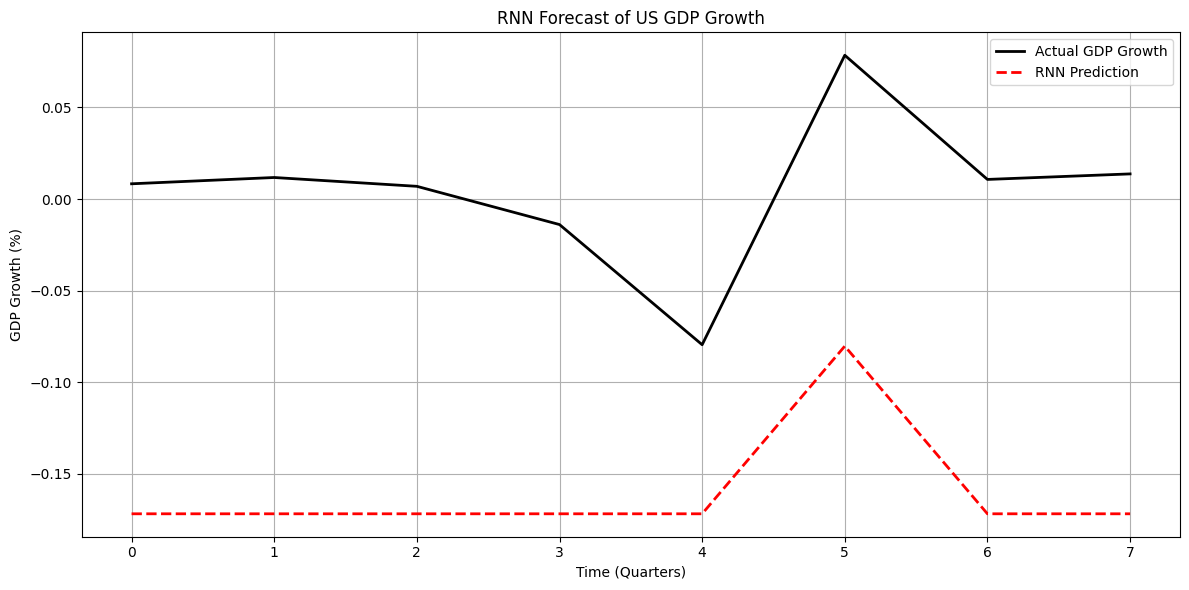

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(actuals, label="Actual GDP Growth", color="black", linewidth=2)
plt.plot(preds, label="RNN Prediction", linestyle="--", color="red", linewidth=2)

plt.title("RNN Forecast of US GDP Growth")
plt.xlabel("Time (Quarters)")
plt.ylabel("GDP Growth (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()